In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#!pip install --upgrade tensorflow
#!pip install tensorflow-gpu==2.1.0
print(tf.__version__)

2.1.0


In [0]:
(train_images,train_labels),(test_images,test_labels)= keras.datasets.mnist.load_data()

train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)

In [0]:
def preprocess_images(images):
  sample_image = images if len(images.shape) == 2 else images[0]
  assert sample_images.shape in ln [(28,28,1),(28,28)],sample_image.shape
  return images/255.0

  train_images = preprocess_images(train_images)
  test_images = preprocess_images(test_images)

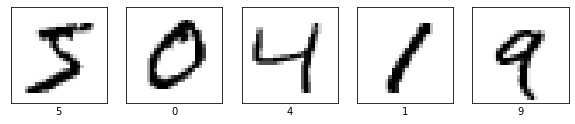

In [4]:
plt.figure(figsize=(10,2))
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i].reshape(28,28),cmap=plt.cm.binary)
  plt.xlabel(train_labels[i])
plt.show()

In [0]:
model = keras.Sequential()
model.add(Conv2D(filters=6, kernel_size=(5,5), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Conv2D(filters=16, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(Conv2D(filters=120, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(84, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
record=model.fit(train_images,train_labels,epochs=100)
test_loss,test_accuracy = model.evaluate(test_images,test_labels)
print('Accuracy : ',test_accuracy)
print('loss : ',test_loss)

Train on 60000 samples
Epoch 1/100
60000/60000 [==============================] - 7s 114us/sample - loss: 0.0869 - accuracy: 0.9845
Epoch 2/100
60000/60000 [==============================] - 7s 110us/sample - loss: 0.0848 - accuracy: 0.9835
Epoch 3/100
60000/60000 [==============================] - 6s 108us/sample - loss: 0.0873 - accuracy: 0.9828
Epoch 4/100
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0861 - accuracy: 0.9837
Epoch 5/100
60000/60000 [==============================] - 7s 113us/sample - loss: 0.0814 - accuracy: 0.9839
Epoch 6/100
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0869 - accuracy: 0.9829
Epoch 7/100
60000/60000 [==============================] - 7s 118us/sample - loss: 0.0750 - accuracy: 0.9843
Epoch 8/100
60000/60000 [==============================] - 7s 117us/sample - loss: 0.0809 - accuracy: 0.9842
Epoch 9/100
60000/60000 [==============================] - 7s 112us/sample - loss: 0.0867 - accuracy: 0.9